# Implementing Support Vector Machine for Cat and Dog Image Classification

## Introduction
In this document, we'll explore the implementation of a Support Vector Machine (SVM) for classifying images of cats and dogs. We'll be using a dataset sourced from Kaggle, aiming to train a model capable of distinguishing between these two animal categories.

## Dataset Description
The Kaggle dataset consists of a collection of images labeled as either cats or dogs. Each image is of varying dimensions and comes with its corresponding label. Before training our SVM model, we'll preprocess the images to ensure they are suitable for the classification task.

## Implementation Steps
1. **Data Loading**: Load the dataset of cat and dog images.
2. **Data Preprocessing**: Resize images to a uniform size, convert them to grayscale, and normalize pixel values.
3. **Feature Extraction**: Extract features from the preprocessed images (e.g., using HOG or deep features).
4. **Model Training**: Train the SVM model using the extracted features.
5. **Model Evaluation**: Evaluate the trained SVM model on a separate test dataset to assess its performance.

In [1]:
# Data Manipulation
#===========================================================================
import numpy as np 
import pandas as pd 

# Operating System
#===========================================================================
import os
import glob
# Image Processing
#===========================================================================
import cv2

# Plotting
#===========================================================================
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

# Feature Extraction
#===========================================================================
from skimage.feature import hog,local_binary_pattern

# Model
#===========================================================================
from sklearn.svm import SVC

# Data Preprocessing 
#===========================================================================
from sklearn.model_selection import train_test_split
from skimage import exposure
from skimage.transform import rotate

# hyperparameter tuning
#===========================================================================
from sklearn.model_selection import RandomizedSearchCV

# Metrics 
#===========================================================================
from sklearn.metrics import accuracy_score,confusion_matrix

# D.R 
#===========================================================================
from sklearn.decomposition import PCA

# Export Data
#===========================================================================
import pickle

# Random 
#===========================================================================
import random

## Load The Images

In [2]:
dir='E:/My_Project/Prodigy InfoTech\Task 3/PetImages'

In [3]:
categories=['Cat','Dog']

This code appears to be part of a data preprocessing step for building a dataset for a machine learning model. Let's break it down:

- `data=[]`: Initializes an empty list called `data` where processed image data will be stored.

- `for category in categories:`: Iterates over a list of categories. It seems like `categories` is a list containing names of different categories of images, such as 'cat', 'dog', etc.

- `path=os.path.join(dir,category)`: Constructs a path by joining a base directory (`dir`) with each category name.

- `label=categories.index(category)`: Assigns a numerical label to each category. The label is the index of the current category in the `categories` list.

- `try:`: Starts a try-except block to handle any potential errors that may occur during image processing.

  - `for img in os.listdir(path):`: Iterates over the list of image files in the current category directory.

    - `imgpath=os.path.join(path,img)`: Constructs the full path to the current image file.

    - `pet_img=cv2.imread(imgpath,0)`: Reads the image using OpenCV (`cv2`) with grayscale mode (`0`). It reads the image as a grayscale image.

    - `pet_img=cv2.resize(pet_img, (50,50))`: Resizes the image to a fixed size of 50x50 pixels. This step ensures that all images have the same dimensions, which is often necessary for machine learning algorithms.

    - `image=np.array(pet_img).flatten()`: Converts the resized image to a NumPy array and flattens it into a 1-dimensional array. This step converts the 2-dimensional image matrix into a 1-dimensional vector, which is commonly used as input to machine learning models.

    - `data.append([image,label])`: Appends the flattened image array along with its corresponding label to the `data` list. Each element appended to `data` is a list containing the flattened image array and its label.

- `except Exception as e:`: Catches any exceptions that occur during image processing and ignores them. This is a general exception handling mechanism to prevent the program from crashing if an error occurs during processing.

Overall, this code reads images from multiple categories, resizes them to a fixed size, converts them into a flat numerical format, and constructs a dataset with image data and corresponding labels for further processing, such as training a machine learning model.


In [4]:
data=[]

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    try:
        for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            pet_img=cv2.imread(imgpath,0)
            # cv2.imshow('image',pet_img)
            pet_img=cv2.resize(pet_img, (50,50)) # All Image are in the same shape 
            image=np.array(pet_img).flatten() # Single Array not Multi Dimintion 2 or Above 

            data.append([image,label])
    except Exception as e:
        pass        
   


In [5]:
len(data)

9920

## Export Data As Pickel 

In [6]:
pickle_in=open('data1.pickel','wb')
pickle.dump(data,pickle_in)
pickle_in.close()

## Import from pickel 

In [7]:
pickle_in=open('data1.pickel','rb')
data=pickle.load(pickle_in)
pickle_in.close()

In [8]:
random.shuffle(data)
Features=[]
labels=[]


for feature,label in data:
    Features.append(feature)
    labels.append(label)
    

## Split data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.20, random_state=42)

## Train SVM model

In [10]:
svm_model = SVC(C=1,gamma='auto',kernel='poly')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

## Predictions

In [11]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

In [12]:
categories=['Cat','Dog']

print('Prediction is : ' ,categories[y_pred_test[0]])

Prediction is :  Cat


## Evaluate model

In [13]:
svm_model.score(X_test,y_test)

0.5957661290322581

In [14]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [15]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.5957661290322581


In [16]:
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

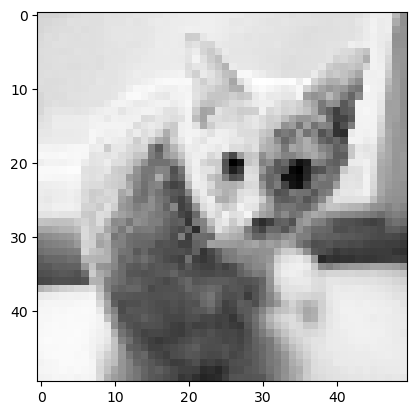

In [17]:
mypet=X_test[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

In [18]:
pick=open('model.sav','wb')
pickle.dump(svm_model,pick)
pick.close()

Text(120.72222222222221, 0.5, 'True Label')

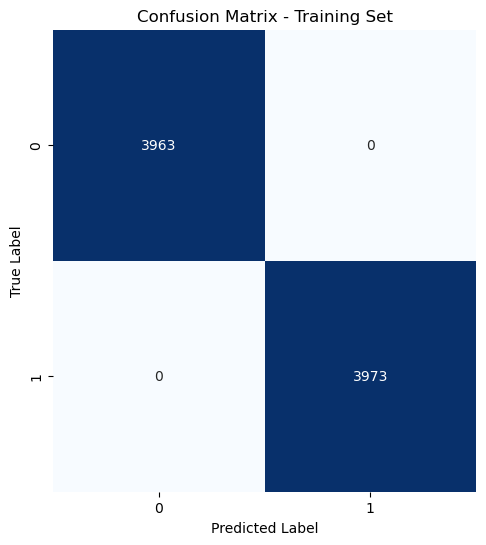

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

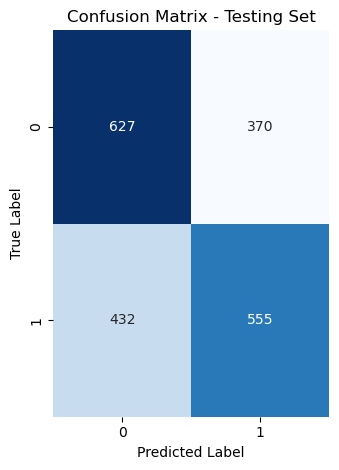

In [20]:
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
svm_model_pca = SVC(kernel='linear')
svm_model_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

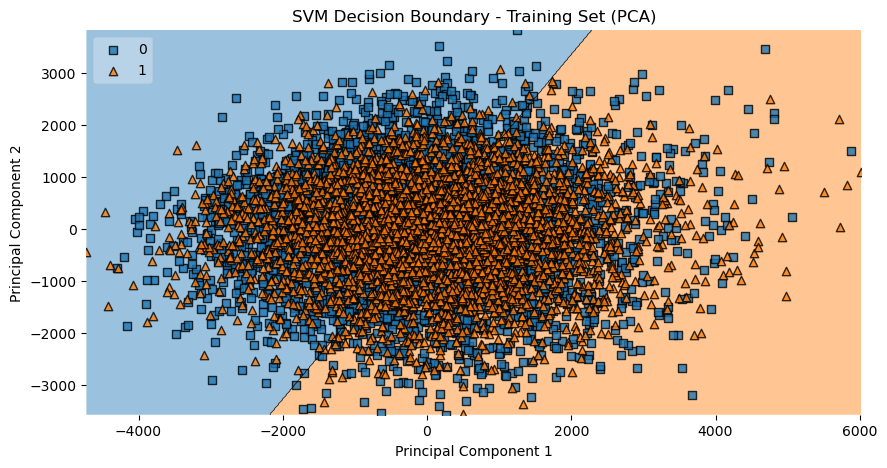

In [27]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X_train_pca, np.array(y_train), clf=svm_model_pca, legend=2)
plt.title('SVM Decision Boundary - Training Set (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


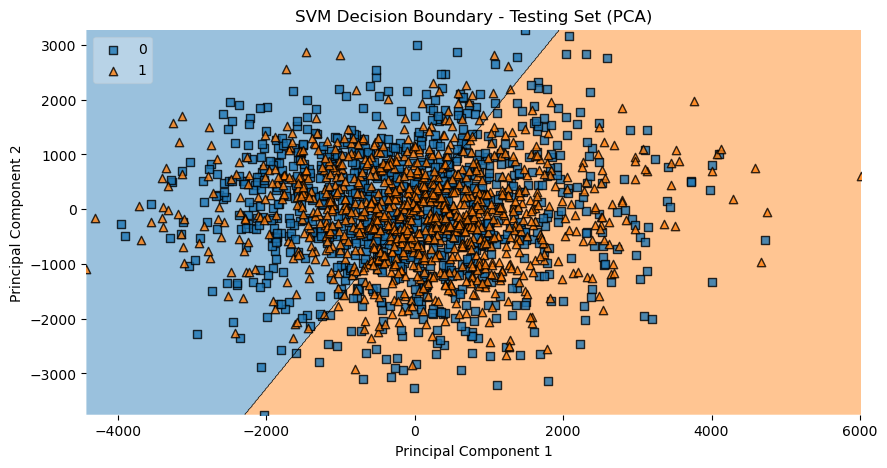

In [26]:
plt.figure(figsize=(10, 5))
plot_decision_regions(X_test_pca,np.array(y_test), clf=svm_model_pca, legend=2)
plt.title('SVM Decision Boundary - Testing Set (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()